# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Kaggle
2. **Dataset url**: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data



---


**Tentang Dataset**

Dataset Telco Customer Churn merupakan dataset contoh dari IBM Sample Data Sets yang digunakan untuk menganalisis perilaku pelanggan dan memprediksi kemungkinan pelanggan berhenti menggunakan layanan (churn). Dataset ini dapat dimanfaatkan untuk mengembangkan strategi retensi pelanggan yang lebih terfokus dan berbasis data.

Tujuan utama dari dataset ini adalah memprediksi perilaku pelanggan untuk mempertahankan mereka. Dengan menganalisis berbagai atribut pelanggan, perusahaan dapat mengidentifikasi faktor-faktor yang memengaruhi keputusan pelanggan untuk berhenti berlangganan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn_raw.csv')

In [3]:
# Lihat 5 baris pertama dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Cek missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pada kolom TotalCharges tipenya masih object (string), padahal isinya angka, ini harus diperbaiki di tahap preprocessing.

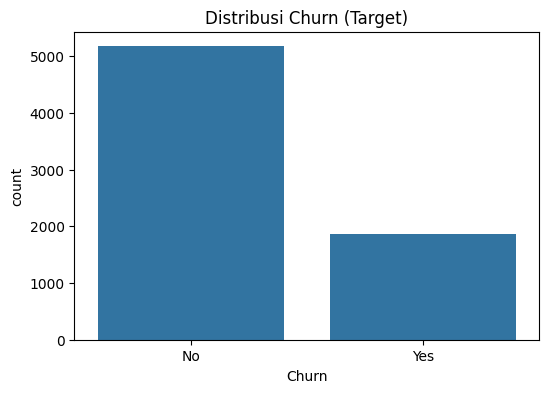

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# Visualisasi Target Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn (Target)')
plt.show()

print(df['Churn'].value_counts())

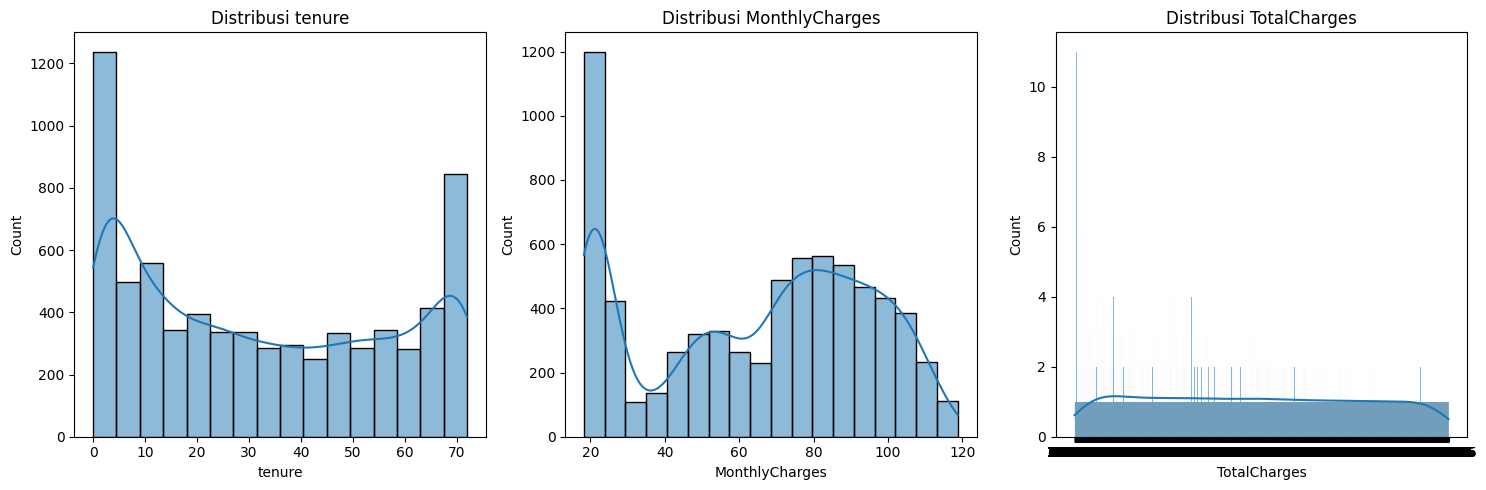

In [7]:
# Cek Distribusi Data Numerik
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

Terlihat bahwa rentang nilai (scale) sangat berbeda, tenure dengan angka puluhan, sedangkan TotalCharges mencapai ribuan. Karena perbedaan skala yang drastis ini, wajib melakukan Scaling (StandardScaler) pada tahap preprocessing agar model tidak bias.

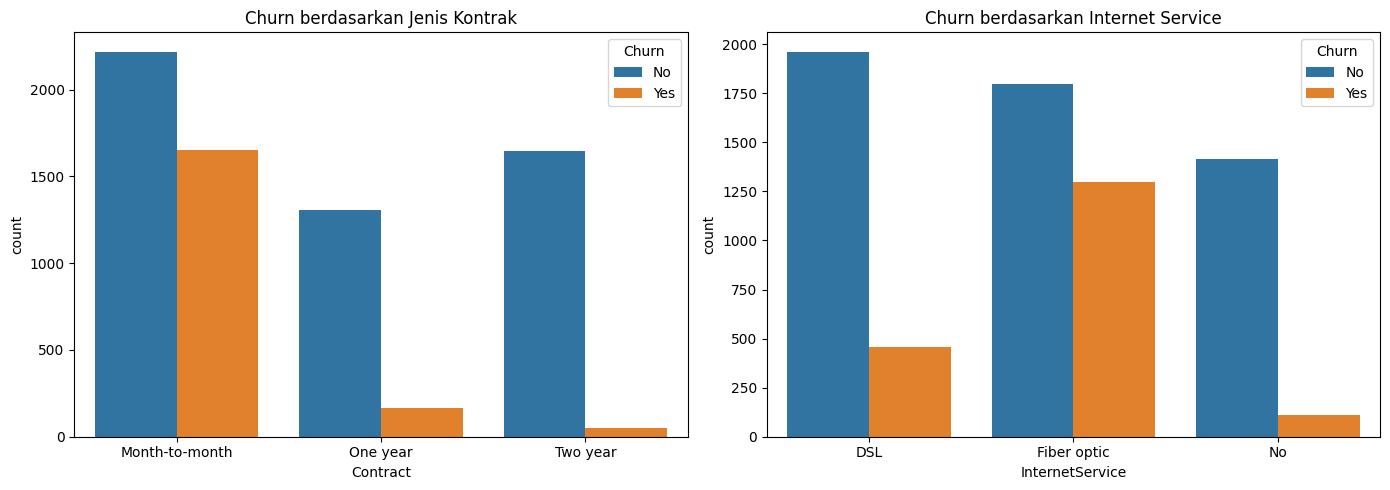

In [8]:
# Cek Hubungan Kategori dengan Churn
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Churn berdasarkan Kontrak
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[0])
ax[0].set_title('Churn berdasarkan Jenis Kontrak')

# Plot Churn berdasarkan Layanan Internet
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1])
ax[1].set_title('Churn berdasarkan Internet Service')

plt.tight_layout()
plt.show()

Pelanggan dengan kontrak bulanan (Month-to-month) dan Internet Fiber Optic memiliki tingkat Churn yang tinggi. Informasi ini sangat berharga, sehingga fitur-fitur kategorikal ini harus disertakan dalam model melalui proses One-Hot Encoding.

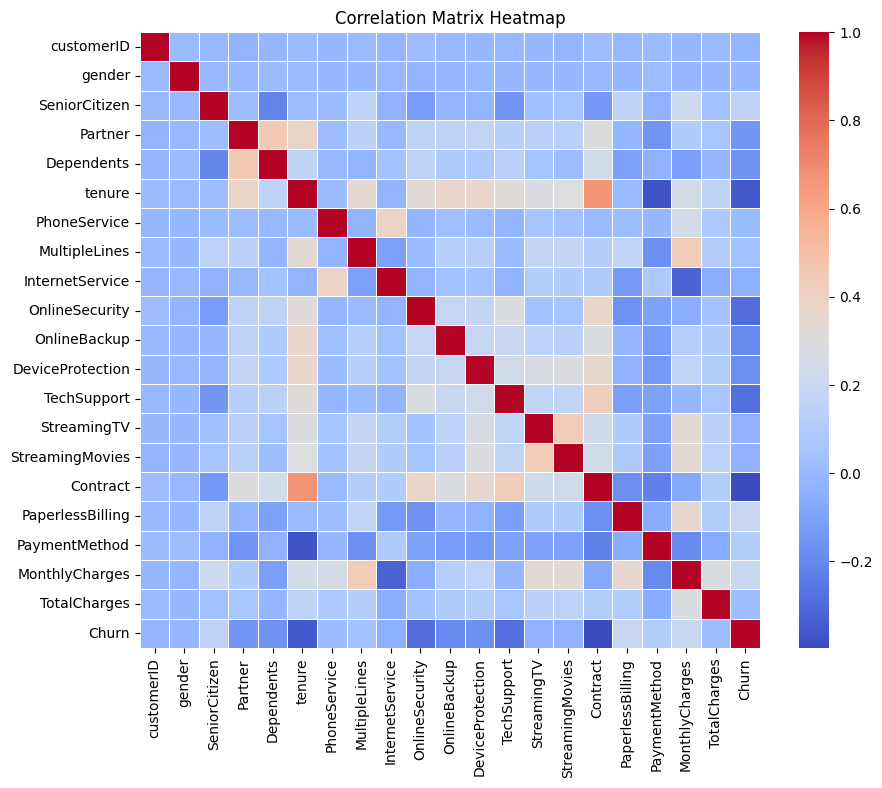

In [9]:
# Cek Korelasi (Heatmap)
plt.figure(figsize=(10, 8))

# Encode sementara hanya untuk visualisasi korelasi
df_temp = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in df_temp.select_dtypes(include='object').columns:
    df_temp[col] = LabelEncoder().fit_transform(df_temp[col])

# Buat heatmap
correlation = df_temp.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Terdapat korelasi positif yang kuat antara tenure dan TotalCharges, ini wajar karena semakin lama berlangganan, total bayar semakin besar.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# Mengubah tipe data TotalCharges menjadi numerik
# errors='coerce' akan mengubah teks yang tidak valid (seperti spasi kosong) menjadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek berapa banyak data yang NaN (kosong)
print("Jumlah missing values di TotalCharges:", df['TotalCharges'].isnull().sum())

# Mengisi NaN dengan 0 (karena biasanya tenure=0 berarti belum bayar apa-apa)
print("Jumlah missing values:", df['TotalCharges'].isnull().sum())

Jumlah missing values di TotalCharges: 11
Jumlah missing values: 11


In [11]:
# Cek jumlah duplikat
print("Jumlah duplikat awal:", df.duplicated().sum())

# Hapus duplikat (jika ada)
df = df.drop_duplicates()

# Hapus kolom customerID
if 'customerID' in df.columns:
    df = df.drop(['customerID'], axis=1)

print("Ukuran data sekarang:", df.shape)
df.head()

Jumlah duplikat awal: 0
Ukuran data sekarang: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


`customerID` tidak memiliki pola yang berguna untuk prediksi mesin, jadi kita hapus.

In [12]:
# encoding data kategorikal
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk Target ('Churn')
# Mengubah 'Yes' -> 1 dan 'No' -> 0
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# Cek hasil mapping
print("Mapping Churn:", dict(zip(le.classes_, le.transform(le.classes_))))

# One-Hot Encoding untuk Fitur Lain (Gender, Partner, dll)
# Mengubah teks kategori menjadi kolom angka 1 dan 0
df = pd.get_dummies(df)

# Ubah True/False menjadi 1/0 (Float) agar aman
df = df.astype(float)

print("Ukuran data setelah encoding:", df.shape)
df.head()

Mapping Churn: {'No': np.int64(0), 'Yes': np.int64(1)}
Ukuran data setelah encoding: (7043, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Scaling (Standarisasi) Fitur Numerik agar kolom 'TotalCharges' (ribuan) tidak mendominasi 'tenure' (puluhan)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Mengubah angka asli menjadi skala standar (sekitar -1 sampai 1)
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Cek bukti scaling (Mean harus mendekati 0, Std harus mendekati 1)
print("Statistik fitur numerik setelah scaling:")
print(df[numerical_features].describe().loc[['mean', 'std']])

Statistik fitur numerik setelah scaling:
            tenure  MonthlyCharges  TotalCharges
mean -2.421273e-17   -6.406285e-17  8.159318e-17
std   1.000071e+00    1.000071e+00  1.000071e+00


In [15]:
# Splitting Data (Membagi Data Latih & Uji)
from sklearn.model_selection import train_test_split

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('Churn', axis=1) # Semua kolom kecuali Churn adalah Fitur
y = df['Churn']              # Kolom Churn adalah Target jawaban

# Bagi data: 80% untuk Latihan (Train), 20% untuk Ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih (Train): {X_train.shape}")
print(f"Ukuran Data Uji (Test)   : {X_test.shape}")

Ukuran Data Latih (Train): (5634, 45)
Ukuran Data Uji (Test)   : (1409, 45)
